In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_openml

In [4]:
data = fetch_openml('titanic',version=1)

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X = data.data.drop(columns=['boat', 'body','name'])
Y = data.target

In [7]:
display(X.head(3))
display(Y.head(3))

,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1.0,female,29.0000,0.0,0.0,24160,211.3375,B5,S,"St Louis, MO"
1,1.0,male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1.0,female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


0    1
1    1
2    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=3, random_state=0)

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 1150 to 684
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1306 non-null   float64 
 1   sex        1306 non-null   category
 2   age        1043 non-null   float64 
 3   sibsp      1306 non-null   float64 
 4   parch      1306 non-null   float64 
 5   ticket     1306 non-null   object  
 6   fare       1305 non-null   float64 
 7   cabin      295 non-null    object  
 8   embarked   1304 non-null   category
 9   home.dest  743 non-null    object  
dtypes: category(2), float64(5), object(3)
memory usage: 94.6+ KB


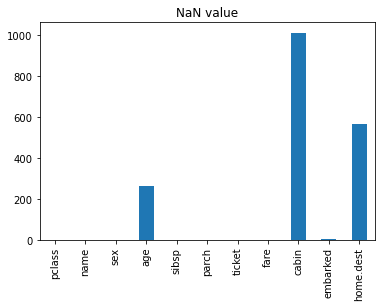

In [17]:
X_train.isna().sum().plot.bar()
plt.title('NaN value')
plt.show()

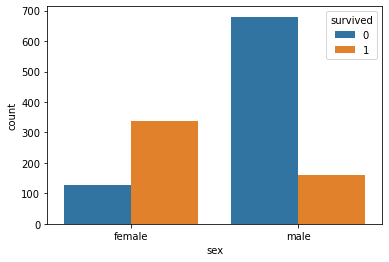

In [23]:
d = pd.concat([X_train.sex, Y_train], axis=1)
sns.countplot(data=d,x='sex',hue='survived')
plt.show()

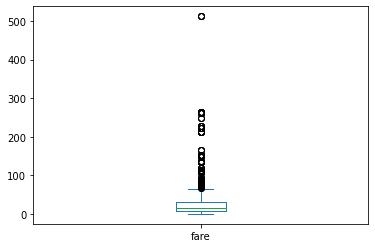

In [25]:
X_train.fare.plot.box()
plt.show()

In [28]:
upper = X_train.fare.quantile(.25) + 1.5*(X_train.fare.quantile(.75) - X_train.fare.quantile(.25))
print(upper)

42.9646


In [29]:
X_train.fare = X_train.fare.clip(upper=upper)

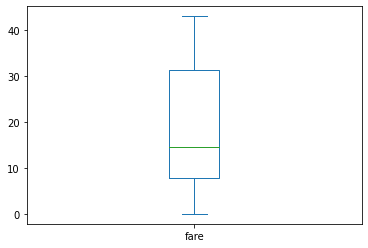

In [30]:
X_train.fare.plot.box()
plt.show()

In [31]:
X_test.fare = X_test.fare.clip(upper=upper)

In [32]:
# mean -> 평균, mode -> 최빈값
X_train['age'] = X_train.age.fillna(X_train.age.mean())
X_train['cabin'] = X_train.cabin.fillna(X_train.cabin.mode()[0])
X_train['embarked'] = X_train.embarked.fillna(X_train.embarked.mode()[0])
X_train['home.dest'] = X_train['home.dest'].fillna('결측치')

In [33]:
X_test['age'] = X_test.age.fillna(X_train.age.mean())
X_test['fare'] = X_test.fare.fillna(X_train.fare.mean())
X_test['cabin'] = X_test.cabin.fillna(X_train.cabin.mode()[0])
X_test['embarked'] = X_test.embarked.fillna(X_train.embarked.mode()[0])
X_test['home.dest'] = X_test['home.dest'].fillna('결측치')